<a href="https://colab.research.google.com/github/arianza1210/Data_Analyst/blob/main/UseCase_Covid_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
# Restart Runtime setelah menjalankan perintah berikut
!pip install matplotlib==3.1.3
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.8 MB/s 
     |████████████████████████████████| 6.3 MB 37.0 MB/s 
     |████████████████████████████████| 16.7 MB 521 kB/s 


In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import datetime
import math

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/covid_19_indonesia_time_series_all.csv')

In [4]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [7]:
df.isna().any()

Date                           False
Location ISO Code              False
Location                       False
New Cases                      False
New Deaths                     False
New Recovered                  False
New Active Cases               False
Total Cases                    False
Total Deaths                   False
Total Recovered                False
Total Active Cases             False
Location Level                 False
City or Regency                 True
Province                        True
Country                        False
Continent                      False
Island                          True
Time Zone                       True
Special Status                  True
Total Regencies                False
Total Cities                    True
Total Districts                False
Total Urban Villages            True
Total Rural Villages            True
Area (km2)                     False
Population                     False
Population Density             False
L

In [8]:
df.fillna(0)
# sama dengan df.dropna(axis="columns")

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,0.00,0.00
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,0.00,0.00
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,0.00,0.00
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


Konversi format tanggal

In [9]:
df['Date'] = df['Date'].astype('datetime64')

mengambil data bulan ke-3 tahun 2020

In [10]:
df_total_in_month_3 = df[(df['Date'].astype('str').str[5:7] == '03') & (df['Date'].astype('str').str[:4] == '2020')].copy()

mengambil total kasus di bulam ke-3 tahun 2020

In [11]:
df_total_in_month_3 = df_total_in_month_3[['Date', 'Total Cases per Million', 'Total Deaths per Million']]

mengambil totoal kasus dan total kematian

In [12]:
df_total_in_month_3 = df_total_in_month_3.groupby(['Date']).agg({'Total Cases per Million':'sum', 'Total Deaths per Million':'sum'}).reset_index()

In [13]:
df_total_in_month_3 = df_total_in_month_3.groupby(['Date']).agg({'Total Cases per Million':'sum', 'Total Deaths per Million':'sum'}).reset_index()

In [14]:
df_total_in_month_3 = df_total_in_month_3.sort_values(by=['Date'])

mengambil tanggal

In [15]:
df_total_in_month_3['Date'] = df_total_in_month_3['Date'].astype('str').str[8:]

In [16]:
df_total_in_month_3

,Date,Total Cases per Million,Total Deaths per Million
0,01,3.60,1.84
1,02,3.95,1.84
2,03,4.15,1.86
3,04,4.36,1.86
4,05,4.39,1.96
5,06,4.51,2.43
6,07,4.51,2.61
7,08,4.64,2.88
8,09,4.69,2.97
9,10,5.10,2.97


Plot chart

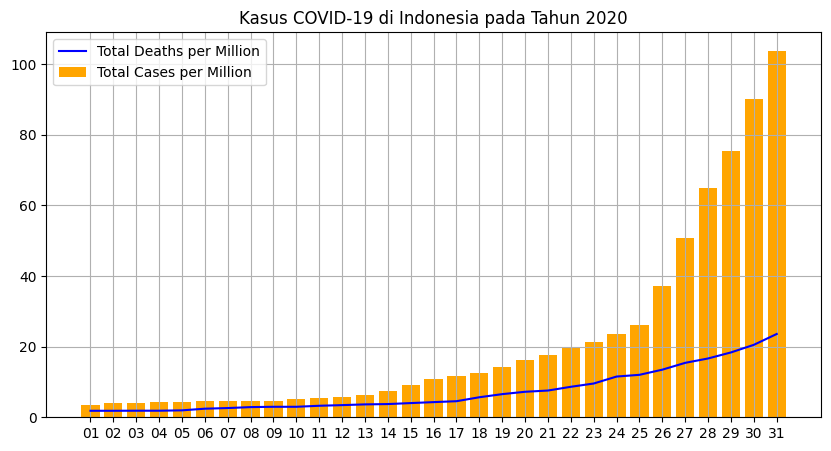

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(df_total_in_month_3['Date'], df_total_in_month_3['Total Deaths per Million'],color='blue', label='Total Deaths per Million')
plt.bar(df_total_in_month_3['Date'], df_total_in_month_3['Total Cases per Million'], color='orange', label='Total Cases per Million')
plt.legend(loc='best')
plt.grid()
plt.title('Kasus COVID-19 di Indonesia pada Tahun 2020')
plt.show()

plot location

In [18]:
df_location = df[['Location', 'Latitude', 'Longitude']].copy()
df_location = df_location.drop_duplicates().reset_index(drop=True)
df_location

,Location,Latitude,Longitude
0,DKI Jakarta,-6.204699,106.836118
1,Indonesia,-0.789275,113.921327
2,Riau,0.511648,101.805109
3,Jawa Barat,-6.920432,107.603708
4,Banten,-6.456736,106.109004
5,Jawa Tengah,-7.259097,110.201115
6,Sulawesi Tenggara,-4.124689,122.070311
7,Bali,-8.369472,115.131714
8,Kalimantan Timur,0.453858,116.468440
9,Daerah Istimewa Yogyakarta,-7.894502,110.444878


In [19]:
gdf = gpd.GeoDataFrame(df_location, geometry=gpd.points_from_xy(df_location['Longitude'], df_location['Latitude']))
gdf.head()

,Location,Latitude,Longitude,geometry
0,DKI Jakarta,-6.204699,106.836118,POINT (106.83612 -6.20470)
1,Indonesia,-0.789275,113.921327,POINT (113.92133 -0.78927)
2,Riau,0.511648,101.805109,POINT (101.80511 0.51165)
3,Jawa Barat,-6.920432,107.603708,POINT (107.60371 -6.92043)
4,Banten,-6.456736,106.109004,POINT (106.10900 -6.45674)


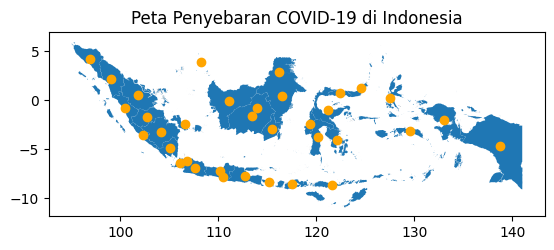

In [20]:
# Set Plotting
df_geo = gpd.read_file('https://raw.githubusercontent.com/bimaputra1/School_Partitipation_Rates_with_GeoPandas/master/gadm36_IDN_1.json')
ax = df_geo.plot()

# Plot Data
gdf.plot(ax=ax, color='orange')
plt.title("Peta Penyebaran COVID-19 di Indonesia")
plt.show()

In [21]:
df_total_in_month_3.describe()

,Total Cases per Million,Total Deaths per Million
count,31.000000,31.000000
mean,21.734516,7.319677
std,26.942804,6.159705
min,3.600000,1.840000
25%,4.665000,2.925000
50%,10.780000,4.290000
75%,22.345000,10.545000
max,103.800000,23.580000


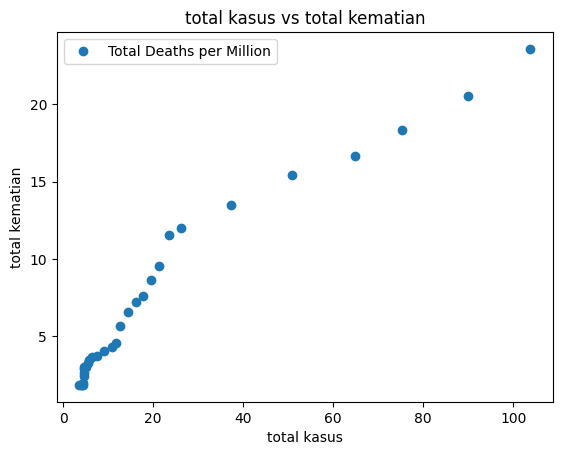

In [22]:
df_total_in_month_3.plot(x='Total Cases per Million',y='Total Deaths per Million',style='o')
plt.title('total kasus vs total kematian')
plt.xlabel('total kasus')
plt.ylabel('total kematian')
plt.show()

In [23]:
data= df_total_in_month_3

In [37]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
regg=LinearRegression()
regg.fit(x_train,y_train)

LinearRegression()

In [40]:
print(regg.intercept_)

-3.552713678800501e-15


In [41]:
print(regg.coef_)

[4.14423446e-16 1.00000000e+00]


In [42]:
y_pred=regg.predict(x_test)

In [43]:
data_f=pd.DataFrame({'Data Sebenarnya': y_test,'Data Prediksi': y_pred})
data_f

,Data Sebenarnya,Data Prediksi
0,4.15,4.15
1,90.02,90.02
2,7.58,7.58
3,5.42,5.42
4,64.84,64.84
5,37.23,37.23
6,21.20,21.20


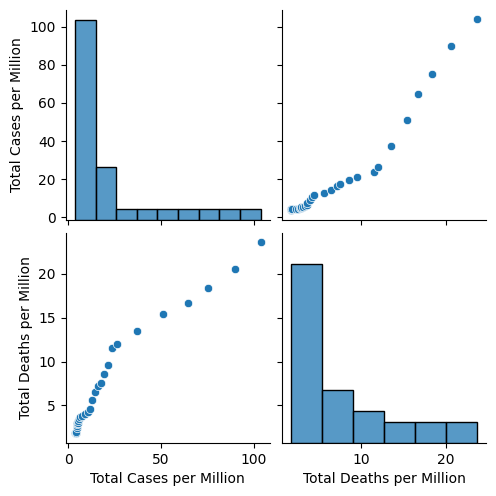

In [44]:
sns.pairplot(data)